In [1]:
import xarray as xr
import numpy as np
from minisom import MiniSom
import pandas as pd
from sklearn.preprocessing import RobustScaler
import pprint
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.gridspec import GridSpec 
import matplotlib.colors as mcolors
from matplotlib import colormaps as cm
import matplotlib.gridspec as gridspec 
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

from som_2var_training import read_and_transform, build_scaler, train_som

# This code cell is meant for testing QE and TE over multiple different configurations of nodes in a miniSOM

In [2]:

grid_sizes = [(x, y) for x in range(2, 9) for y in range(2, 9)]

scores = {}
for x, y in grid_sizes:
    prefs = {'filename': "/home/scratch/bweart1/som/z500_pwat.nc", 
             'var1': 'gh', 'var2': 'pwat', 'wlon': 220, 'elon': 305, 'nlat': 55, 'slat': 20, 
             'som_config': {'x': x, 'y': y, 'sigma': 0.5, 'random_seed': 42},
             'som_train': {'num_iteration': 10000, 'random_order': True, 'verbose': True}}

    trained_som, trained_scaler, train_info, xr_data, npy = train_som(prefs)
    te = trained_som.topographic_error(npy)
    qe = trained_som.quantization_error(npy)
    scores[(x,y)]= te,qe

    



current model configuration
{'input_len': 24282, 'random_seed': 42, 'sigma': 0.5, 'x': 7, 'y': 2}
current training configuration
{'data': array([[-0.66050106, -0.68316907, -0.70958024, ..., -0.7250001 ,
        -0.7583334 , -0.7583332 ],
       [-0.71175027, -0.7709796 , -0.83132076, ..., -0.39166674,
        -0.35000005, -0.2916665 ],
       [-0.28915408, -0.28948432, -0.29526958, ..., -0.6833334 ,
        -0.8833334 , -1.0499998 ],
       ...,
       [-0.87913156, -0.8735199 , -0.8690234 , ...,  0.5749998 ,
         0.49166647,  0.375     ],
       [-0.31367952, -0.29052007, -0.26362565, ...,  0.25887743,
         0.21721077,  0.16721089],
       [-0.43595633, -0.43200427, -0.43102336, ..., -0.10833359,
        -0.19166677, -0.24999984]], dtype=float32),
 'num_iteration': 10000,
 'random_order': True,
 'verbose': True}
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 75.23108761872471
current model configuration
{'input_len': 24282, 'random_seed': 42, 'sigma': 0.5, 'x': 7

In [4]:
scores

{(2, 2): (np.float64(0.0), np.float64(81.038817707177)),
 (2, 3): (np.float64(0.0594113620807666), np.float64(78.3709538538604)),
 (2, 4): (np.float64(0.1995893223819302), np.float64(77.48394797673164)),
 (2, 5): (np.float64(0.36865160848733747), np.float64(76.43773698330168)),
 (2, 6): (np.float64(0.38316221765913755), np.float64(75.5252469459499)),
 (2, 7): (np.float64(0.739356605065024), np.float64(75.29605598447829)),
 (2, 8): (np.float64(0.6480492813141684), np.float64(75.16004816037243)),
 (3, 2): (np.float64(0.0594113620807666), np.float64(78.3709538538604)),
 (3, 3): (np.float64(0.34045174537987677), np.float64(77.36640058484704)),
 (3, 4): (np.float64(0.45585215605749485), np.float64(75.60703447713865)),
 (3, 5): (np.float64(0.5103353867214236), np.float64(75.25029447086543)),
 (3, 6): (np.float64(0.6877481177275838), np.float64(74.11301801929065)),
 (3, 7): (np.float64(0.6683093771389459), np.float64(73.5858483879411)),
 (3, 8): (np.float64(0.5994524298425736), np.float64(73.

# Unpack dictionaries and the tuple keys to extract values and plot

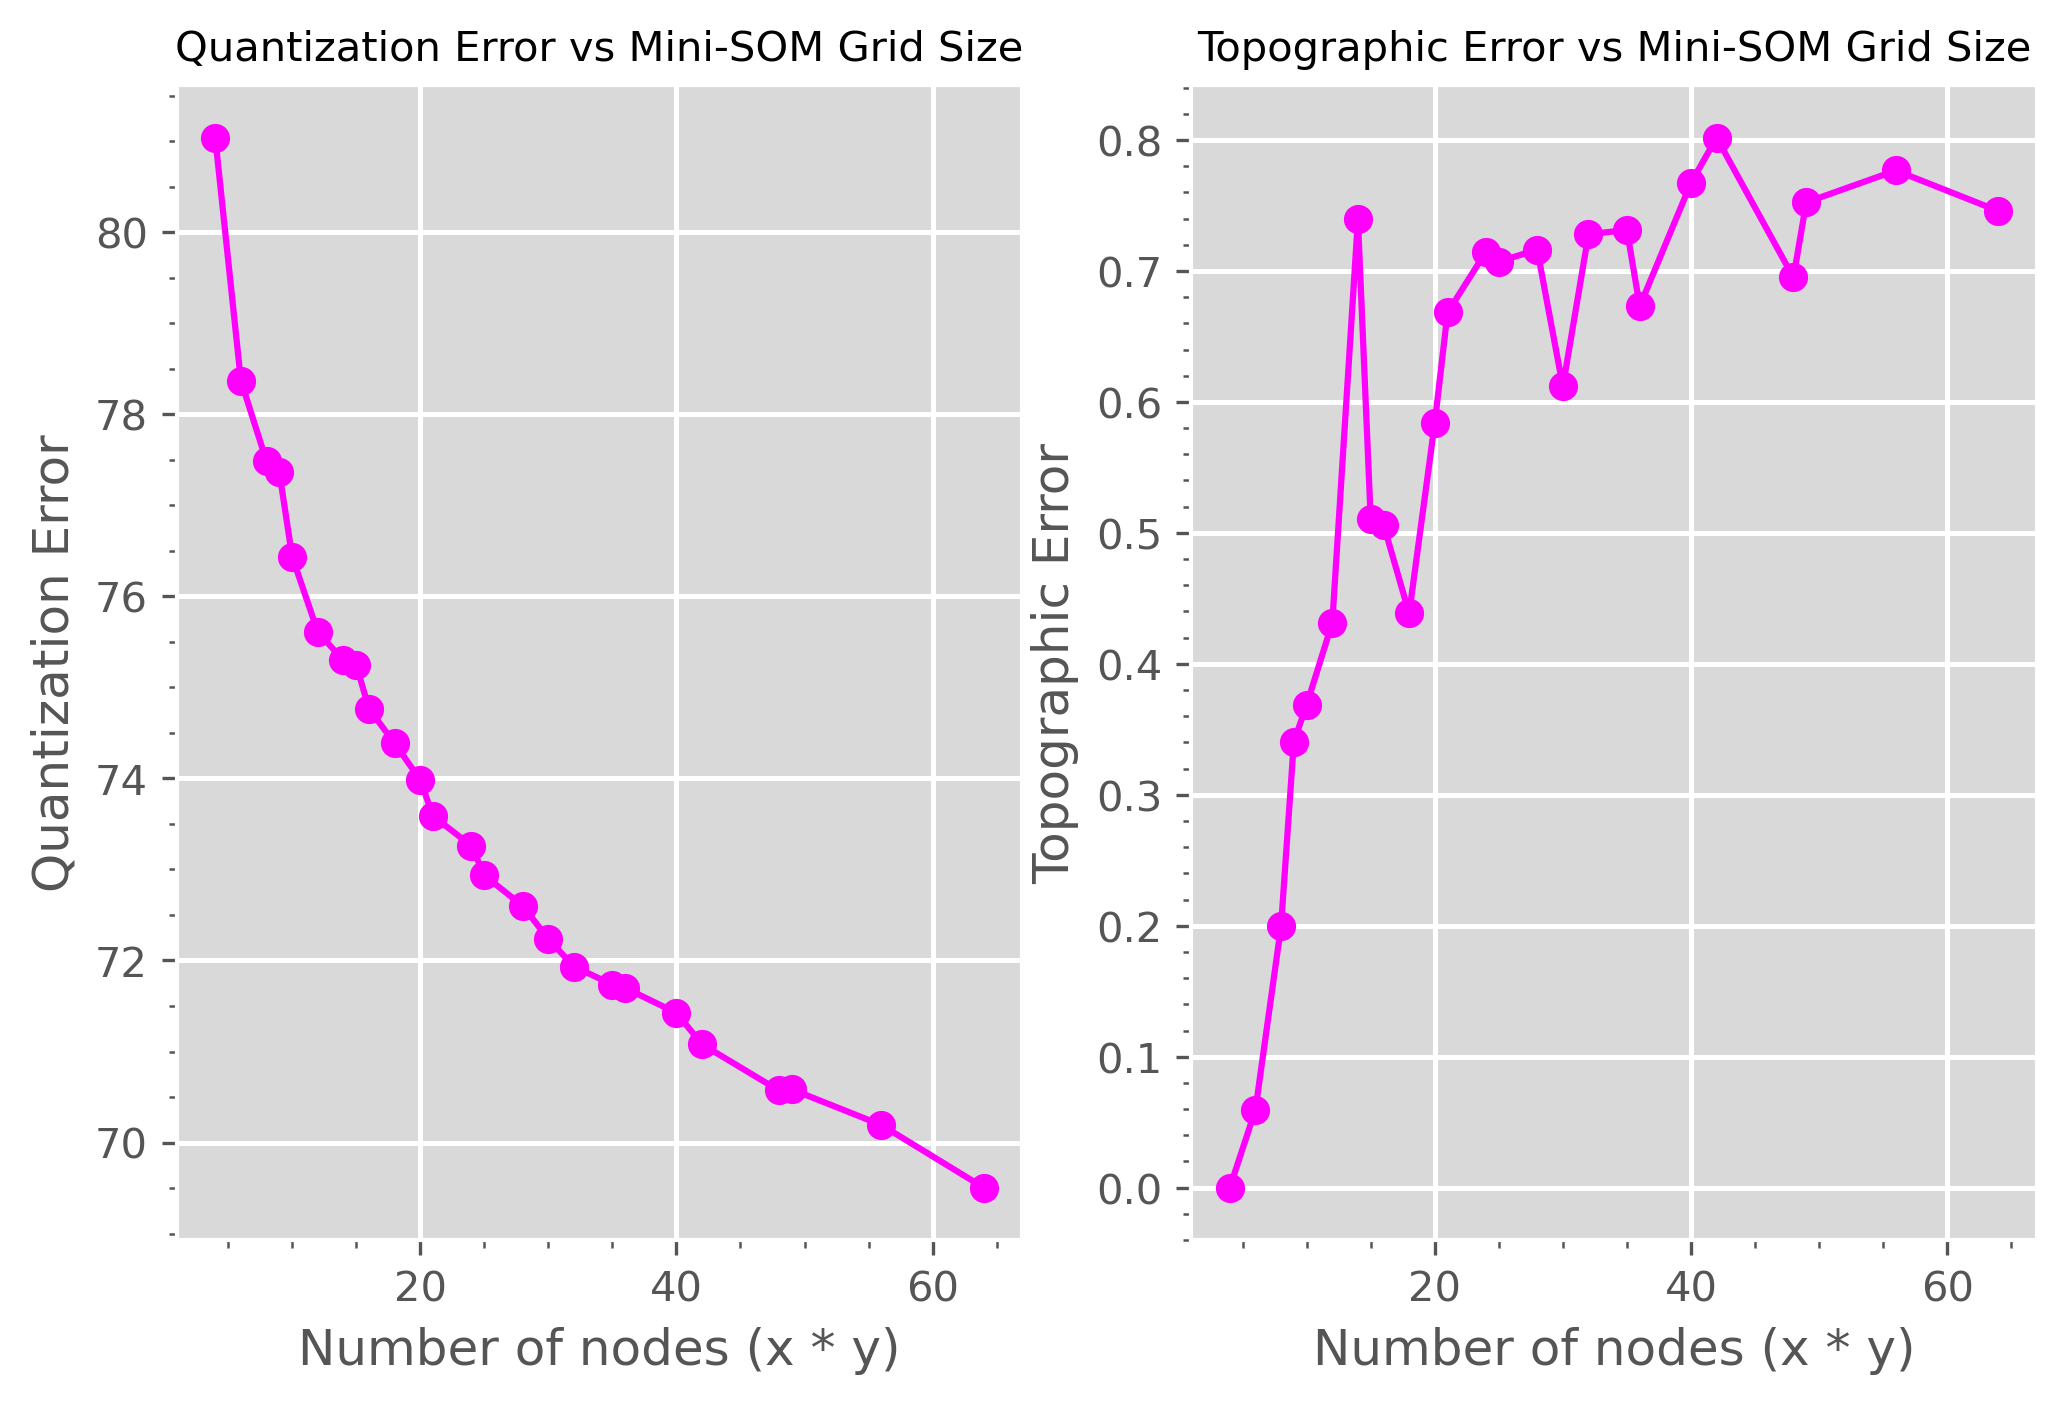

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
node_counts = np.array([x*y for (x, y) in scores.keys()])
te     = np.array([scores[(x, y)][0] for (x, y) in scores.keys()], dtype=float) # Unpacks TE from the first index of the value tuple
qe     = np.array([scores[(x, y)][1] for (x, y) in scores.keys()], dtype=float) # Unpacks QE from the second index of the value tuple

order = np.argsort(node_counts)
node_counts = node_counts[order]
te = te[order]
qe = qe[order]

_, unique_idx = np.unique(node_counts, return_index=True)
node_counts = node_counts[unique_idx]
te = te[unique_idx]
qe = qe[unique_idx]

# reset + apply ggplot
mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use("ggplot")

fig, axes = plt.subplots(1,2,figsize=(8, 5), dpi=300)
names = ['Quantization', "Topographic"]
variables = [qe, te]
for ax, var, name in zip(axes, variables, names):
# make the panel gray more obvious
    ax.set_facecolor("#D9D9D9")      # darker than default
    fig.patch.set_facecolor("white") # outside the panel
    
    # your plot
    ax.plot(node_counts, var, marker="o", c='magenta',label='QE')
    # ax.plot(node_counts_te, qe_vals_te, marker="o", c='darkblue', label='TE')
    ax.set_xlabel("Number of nodes (x * y)")
    ax.set_ylabel(f"{name} Error")
    ax.set_title(f"{name} Error vs Mini-SOM Grid Size",fontsize=10)
    
    # make gridlines look like ggplot2
    ax.minorticks_on()
    ax.grid(True, which="major", color="white", linewidth=1.2)
    # ax.grid(True, which="minor", color="white", linewidth=0.6, alpha=0.8)
    # plt.savefig('Relevant Figures/Elbow_Test_MiniSOM_TwoVar.png', dpi=300, bbox_inches='tight')
plt.show()







array([[0.00000000e+00, 8.10388177e+01],
       [5.94113621e-02, 7.83709539e+01],
       [1.99589322e-01, 7.74839480e+01],
       [3.40451745e-01, 7.73664006e+01],
       [3.68651608e-01, 7.64377370e+01],
       [4.31485284e-01, 7.56110023e+01],
       [7.39356605e-01, 7.52960560e+01],
       [5.10335387e-01, 7.52502945e+01],
       [5.06365503e-01, 7.47649399e+01],
       [4.38466804e-01, 7.43863493e+01],
       [5.83846680e-01, 7.39844575e+01],
       [6.68309377e-01, 7.35858484e+01],
       [7.14715948e-01, 7.32601294e+01],
       [7.07186858e-01, 7.29354959e+01],
       [7.16221766e-01, 7.25998243e+01],
       [6.11772758e-01, 7.22367792e+01],
       [7.27994524e-01, 7.19332869e+01],
       [7.31279945e-01, 7.17355524e+01],
       [6.73100616e-01, 7.16981904e+01],
       [7.67145791e-01, 7.14244321e+01],
       [8.01779603e-01, 7.10790149e+01],
       [6.95003422e-01, 7.05720144e+01],
       [7.52361396e-01, 7.05845902e+01],
       [7.76728268e-01, 7.01924443e+01],
       [7.457905